In [24]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import string
%matplotlib inline 

def cleanToLetters(str):
    remainingChars = []
    for ch in str:
        if (ch in string.ascii_letters or ch == ' '):
            remainingChars.append(ch)
    newString = string.join(remainingChars, "")
    return newString.lower()

def removeStopWords(str, set):
    toks = str.split()
    new_toks = []
    for elem in toks:
        if elem not in set:
            new_toks.append(elem)
    return string.join(new_toks, " ");

def printMostCommonWords(vectorizer, component):
    cuttOff = max(abs(component)) - 0.02
    for i in range(0, len(component)):
        if abs(component[i]) > cuttOff:
            for key, value in vectorizer.vocabulary_.iteritems():
                if (value == i):
                    print key

vectorizer = CountVectorizer(min_df=1, stop_words = 'english')
stop_words = vectorizer.get_stop_words()
#stop_words = ['you', 'the', 'and', 'a', 'an', 'how', 'as', 'or', 'we', 'i', 'be']

studentIds = []
passingIndicators = []
responses = []
rawReponses = []
grades = []
wordCounts = []
responses_w_stop_words = []
with open('schell9_2.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        studentId = row[0]
        course = row[6]
        numericGrade = row[9]
        letterGrade = row[10]
        response = row[13]
        
        if float(numericGrade) < 70:
            passingIndicator = 0
        else:
            passingIndicator = 1;
            
        if (True or course == 'M 408N'):
            if "xml" not in response and "0px" not in response and not "img" in response and len(cleanToLetters(response).strip()) > 3:
                studentIds.append(int(studentId))
                rawReponses.append(response)
                grades.append(float(numericGrade))
                cleaned = cleanToLetters(response)
                responses_w_stop_words.append(cleaned)
                wordCount = len(cleaned.split())
                wordCounts.append(wordCount)
                cleaned_no_stop_words = removeStopWords(cleaned, stop_words)
                responses.append(cleaned_no_stop_words)
                passingIndicators.append(passingIndicator)
                
data = {'studentId' : studentIds, 'grades' : grades, 'pass' : passingIndicators, 
        'responses' : responses, "raw" : rawReponses, 'wordCount' : wordCounts}
frame = pd.DataFrame(data)
frame.head()


,grades,pass,raw,responses,studentId,wordCount
0,91.913717,1,How to compute inverse trigonometry.,how to compute inverse trigonometry,1486608,5
1,91.913717,1,"Figuring out what the natural domain of f is,...",figuring out what the natural domain of f is g...,1486608,12
2,95.745009,1,I am still confused about inverse trig functi...,i am still confused about inverse trig functio...,1486619,20
3,95.745009,1,"In general, I am a bit confused about everyth...",in general i am a bit confused about everythin...,1486619,57
4,95.745009,1,Daniel Garcia EID: djg2594 I had significant ...,daniel garcia eid djg i had significant troubl...,1486619,43


In [25]:

groupedStudentIds = []
groupedPassingIndicators = []
groupedResponses = []
groupedGrades = []
groupedWordCounts = []
for name, group in frame.groupby('studentId'):
    groupedStudentIds.append(name)
    groupedGrades.append(group['grades'].max())
    groupedPassingIndicators.append(group['pass'].max())
    groupedResponses.append(string.join(group['responses'].tolist(), ' '))
    groupedWordCounts.append(group['wordCount'].mean())

groupedData = {'studentId' : groupedStudentIds, 'grades' : groupedGrades, 
               'pass' : groupedPassingIndicators, 'responses' : groupedResponses,
               'wordCountMean' : groupedWordCounts}
groupedFrame = pd.DataFrame(groupedData)
groupedFrame.head()


,grades,pass,responses,studentId,wordCountMean
0,83.668937,1,i dont quite understand what arcs in meansas w...,1486607,19.500000
1,91.913717,1,how to compute inverse trigonometry figuring o...,1486608,9.125000
2,80.108808,1,nothing i had trouble with the last question w...,1486609,10.233333
3,90.550902,1,i am a little confused as to how we are suppos...,1486610,20.500000
4,99.416510,1,the one with the add and subtraction of logs w...,1486611,14.666667


In [26]:
vectorizer = CountVectorizer(min_df=8, max_df = 0.05, ngram_range = (1, 4))
wordVector = vectorizer.fit_transform(groupedResponses)
vectorizer.vocabulary_


{u'approach the': 204,
 u'way that': 2802,
 u'me still': 1463,
 u'fit': 769,
 u'and using': 166,
 u'rates questions': 1932,
 u'im doing wrong': 1072,
 u'that to': 2201,
 u'plugged in': 1784,
 u'when doing': 2847,
 u'is very confusing': 1211,
 u'still confused on review': 2114,
 u'we take': 2813,
 u'module everything': 1492,
 u'exact': 672,
 u'related rates the': 1953,
 u'following': 772,
 u'to how the': 2576,
 u'bit difficult': 290,
 u'to exist': 2548,
 u'local max': 1406,
 u'graphed': 934,
 u'certain functions': 342,
 u'the last question the': 2313,
 u'be explained': 267,
 u'see the': 2006,
 u'wording': 2926,
 u'will need': 2896,
 u'funtion': 872,
 u'the answer to the': 2210,
 u'entire module': 629,
 u'am still confuse': 91,
 u'finding the equation': 756,
 u'area under curve': 221,
 u'do the last question': 571,
 u'range of': 1927,
 u'functions and how to': 852,
 u'the change': 2229,
 u'to integrals': 2580,
 u'function is increasing or': 839,
 u'of in': 1641,
 u'with absolute': 2898,


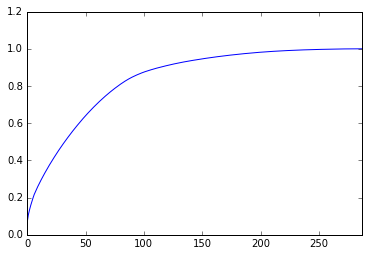

In [27]:
# View the accumulated sum of the eigenvalue ratios looking for the "elbow" to use as a cut off
pca = PCA(n_components=1000)
pca.fit(wordVector.toarray())

l = []
for i in range(0, len(pca.explained_variance_ratio_)):
    accumulatedVariance = sum(pca.explained_variance_ratio_[0:(i+1)])
    l.append(accumulatedVariance)
             
s = pd.Series(l)
s.plot()

In [28]:
# Obtain the base vectors for a lower dimensional space.
pca = PCA(n_components=100)
pca.fit(wordVector.toarray())
wordVectorReduced = pca.transform(wordVector.toarray())


In [29]:
print "Common words in component 0:"
printMostCommonWords(vectorizer, pca.components_[0])
print "Common words in component 1:"
printMostCommonWords(vectorizer, pca.components_[1])
print "Common words in component 2:"
printMostCommonWords(vectorizer, pca.components_[2])
print "Common words in component 3:"
printMostCommonWords(vectorizer, pca.components_[3])
print "Common words in component 4:"
printMostCommonWords(vectorizer, pca.components_[4])

Common words in component 0:
about this module
Common words in component 1:
about this module
Common words in component 2:
do not have
Common words in component 3:
all is
its all
Common words in component 4:
all is


model MSE: 136.132065125
MSE from average: 187.939652446


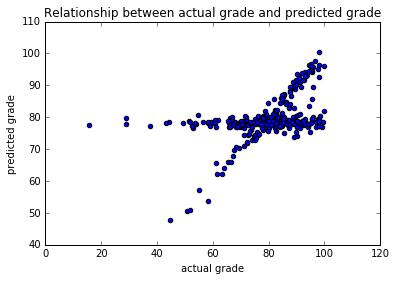

In [30]:
YGrades = np.array(groupedGrades, dtype = float)
X = pd.DataFrame(wordVectorReduced)
lm = LinearRegression()
lm.fit(X, YGrades)
groupedFrame["Predicted Grade"] = lm.predict(X)

plt.scatter(YGrades, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

print "model MSE:", np.mean((YGrades - lm.predict(X)) ** 2)
print "MSE from average:", np.mean((YGrades - np.mean(YGrades)) ** 2)


In [31]:
clf = LogisticRegression()
YPassFail = np.array(groupedPassingIndicators, dtype = float)
clf.fit(X, YPassFail)
groupedFrame["Pass Probabiliy"] = [x[1] for x in clf.predict_proba(X)]
groupedFrame.to_csv('predictions.csv')


In [32]:
groupedFrame.describe()

,grades,pass,studentId,wordCountMean,Predicted Grade,Pass Probabiliy
count,288.000000,288.000000,2.880000e+02,288.000000,288.000000,288.000000
mean,79.752337,0.798611,1.554084e+06,13.450381,79.752337,0.789063
std,13.732971,0.401736,9.080049e+04,5.891044,7.210277,0.213366
min,15.573811,0.000000,1.486607e+06,3.000000,47.653975,0.001718
25%,72.395563,1.000000,1.486714e+06,10.000000,77.395610,0.705305
50%,82.347507,1.000000,1.492580e+06,12.244172,78.407235,0.791346
75%,90.176858,1.000000,1.686051e+06,15.120614,80.767218,0.962516
max,100.011454,1.000000,1.697135e+06,44.666667,100.364740,1.000000
